# Different imports and setup

In [4]:
# Different libraries import
import pandas as pd
from datetime import datetime
import bz2
import json
from tqdm.notebook import tqdm

# Tutorial 

## Extracting the domain names

This is an example on how to extract domain names from a sample. To do that, we can use *tld* library. To install it:

Following function then gives domain name. It takes as an argument an URL and returns the domain name:

In [5]:
from tld import get_tld

def get_domain(url):
    res = get_tld(url, as_object=True)
    return res.tld


Now we will have to read the data. Each sample has property 'urls' which contains a list of links to the original articles containing the quotation. We will extract domain names for these links. Then, we will save a new file that contains samples with extracted domains. The new file will be saved in local storage in Colab but you can change path_to_out variable (optionally) if you want to save it directly to the drive. To generate a new file, run this cell:

It should take around 25min for this cell to finish running and you will be able to see a file (*quotes-2020-domains.json.bz2*) in the file explorer on the left side once it is done.

You are all set, good luck! :)

# Milestone 1




## Project description

First, one could try to associate a certain type of quote to the day(and even date) of the article. We do not have any pre-established pattern, but one could try to find one if any exists. Maybe there is a link between the nature of the quotation (political, good news/bad news, humoristic quote, and so on) and the day of the article. This can also be done with the consideration of historical event on the date of the publication. For example, there might be less joyful quotes in days during which tragic events happened.

## Code

### Functions

In [6]:
def retrieve_day(Date):
  """ Retrieve the day from a date with format 'YYYY-MM-DD hh:mm:ss' where Y is years, M months, D day, h hours,
      m minut and s seconds 
      Needs the following import :
      from datetime import datetime
      """

  try:                        
    date = datetime.strptime(Date, '%Y-%m-%d %H:%M:%S') # Convert to a datetime object and check that the format is correct and the numbers are valid
  except ValueError:
    raise ValueError('The string \'' + Date + '\' does not match the format \'YYYY-MM-DD hh:mm:ss\'') from None # Customize the error message

  if (date.year not in [2015, 2016, 2017, 2018, 2019, 2020]): # Check that the year is in the correct interval and that we do not have wrong data
    raise ValueError(f'The year {date.year} that you provided is not between 2015 and 2020 (inclusive).')

  weekday = datetime.isoweekday(date) # Obtain the weekday from 1 (monday) to 7 (sunday)

  # There are no switch/case statement in Python <= 3.10...
  if (weekday == 1):
    return 'Monday'
  elif (weekday == 2):
    return 'Tuesday'
  elif (weekday == 3):
    return 'Wednesday'
  elif (weekday == 4):
    return 'Thursday'
  elif (weekday == 5):
    return 'Friday'
  elif (weekday == 6):
    return 'Saturday'
  else:
    return 'Sunday'

In [7]:
def create_frame(filename, N):
  """ Creates a DataFrame with the N first rows of the file with filename 
      It is useful to load small portions and test things.            """
  list_of_dicts = []
  with bz2.open(filename, 'rb') as s_file:
      for i, instance in enumerate(s_file):
        if (i>N-1):
            break
        instance = json.loads(instance) # loading a sample
        list_of_dicts.append(instance)
      
  return pd.DataFrame(list_of_dicts)
        

### Main code

In [52]:
filename = 'quotes-2016_days_sentiment.json.bz2' 
df = create_frame(filename, 200000)

In [9]:
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,sentiment
0,2015-08-31-000271,... a great day for veterans here in Littleton...,Jeanne Shaheen,[Q270316],2015-08-31 02:10:00,2,"[[Jeanne Shaheen, 0.742], [None, 0.2359], [Kel...",[http://www.unionleader.com/article/20150831/N...,E,Monday,"{'neg': 0.051, 'neu': 0.759, 'pos': 0.191, 'co..."
1,2015-12-08-029916,How FFA scored 32 own goals in 18 months and C...,None,[],2015-12-08 00:00:00,2,"[[None, 0.563], [David Gallop, 0.437]]",[http://feeds.theroar.com.au/~r/theroar/~3/tZ3...,E,Tuesday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2015-09-10-000206,[ Amy ] was placed under an unacceptable amoun...,None,[],2015-09-10 21:18:59,1,"[[None, 0.9634], [Amy Robinson, 0.0366]]",[http://www.thefashionspot.com/buzz-news/lates...,E,Thursday,"{'neg': 0.421, 'neu': 0.579, 'pos': 0.0, 'comp..."
3,2015-07-23-032707,How High Will These Numbers Go?,None,[],2015-07-23 14:57:49,3,"[[None, 0.9019], [Chubby Checker, 0.0981]]","[http://www.billboard.com/node/6641719, http:/...",E,Thursday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2015-10-04-000115,[ Ban ] recalls that hospitals and medical per...,Ban Ki-moon,[Q1253],2015-10-04 08:27:38,2,"[[Ban Ki-moon, 0.8399], [None, 0.1601]]",[http://muslimnews.co.uk/news/middle-east/afgh...,E,Sunday,"{'neg': 0.195, 'neu': 0.649, 'pos': 0.157, 'co..."


In [7]:
a = retrieve_day(df.loc[2, 'date'])
print(a)

Monday


In [90]:
searchfor = ['coal', 'gas', 'oil', 'climate', 'global warming', 'fossil fuel', 'CO2', 'greenhouse', 'petrol']

In [91]:
climate_df = df.loc[df['speaker'] != 'None'][df['quotation'].str.contains('|'.join(searchfor))]

/tmp/ipykernel_72629/3681146366.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  climate_df = df.loc[df['speaker'] != 'None'][df['quotation'].str.contains('|'.join(searchfor))]


<AxesSubplot:xlabel='sentiment', ylabel='Count'>

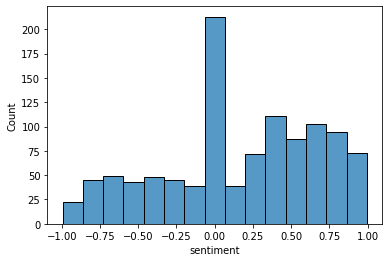

In [92]:
sns.histplot(climate_df['sentiment'].apply(lambda x: x.get('compound')))

In [96]:
pd.set_option('display.max_colwidth', None)

In [97]:
climate_df.loc[climate_df['sentiment'].apply(lambda x: x.get('compound')) < 0]['quotation']

388                                                                                                                                                                                                                                                                               As expected, lower commodity prices impacted earnings in this segment, as our realized weighted average oil price for the quarter was $59.55 per barrel compared to $72.62 per barrel for the first quarter of 2015,
587                                                                                                                                                                                                                                     But almost no climate model can simulate these storms. Even though these storms are big enough for the models to capture, they are more complicated than the smaller isolated thunderstorms or the larger frontal rainstorms that models are wired to produce.
1407                      

In [93]:
climate_df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,sentiment
388,2016-04-20-009755,"As expected, lower commodity prices impacted e...",Steve Kean,[Q1200242],2016-04-20 00:00:00,2,"[[Steve Kean, 0.701], [None, 0.299]]",[http://eon.businesswire.com/news/eon/20160420...,E,Wednesday,"{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'comp..."
587,2016-12-01-016351,But almost no climate model can simulate these...,Ruby Leung,[Q58098476],2016-12-01 05:00:00,3,"[[Ruby Leung, 0.8571], [None, 0.1097], [Zhe Fe...",[http://eurekalert.org/pub_releases/2016-12/dn...,E,Thursday,"{'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compou..."
750,2016-09-29-019755,Coast Guard at the highest levels... simply sa...,President Barack Obama,[Q76],2016-09-29 10:40:06,1,"[[President Barack Obama, 0.7895], [None, 0.21...",[http://takepart.com/feature/2016/09/29/oil-ri...,E,Thursday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1090,2016-12-01-030373,"For instance, Stoneville 4946GLB2 has been a v...",Andy White,"[Q18159160, Q1878971, Q4761470, Q4761471, Q476...",2016-12-01 09:00:00,3,"[[Andy White, 0.7499], [None, 0.2501]]",[http://deltafarmpress.com/industry-voice/thre...,E,Thursday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1205,2016-07-19-025193,HAARP is an advanced model of a super powerful...,Anil Madhav Dave,[Q19975765],2016-07-19 10:37:03,1,"[[Anil Madhav Dave, 0.9659], [None, 0.0341]]",[http://defence.pk/threads/global-warming-migh...,E,Tuesday,"{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'comp..."
...,...,...,...,...,...,...,...,...,...,...,...
198322,2016-09-20-034994,How we respond to climate change will be the l...,Benjamin Santer,[Q58322818],2016-09-20 14:01:17,3,"[[Benjamin Santer, 0.8152], [None, 0.1509], [F...",[http://www.mercurynews.com/2016/09/20/scienti...,E,Tuesday,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
198416,2016-08-20-018604,I cannot rule out the possibility that a compa...,Ernst Nolte,[Q65108],2016-08-20 00:00:00,1,"[[Ernst Nolte, 0.5618], [None, 0.4382]]",[http://www.wsws.org/en/articles/2016/08/20/no...,E,Saturday,"{'neg': 0.304, 'neu': 0.585, 'pos': 0.111, 'co..."
198856,2016-08-10-039398,I think it all boils down to maturity. Whoever...,de Jesus,"[Q36553259, Q5361013]",2016-08-10 03:07:49,1,"[[de Jesus, 0.9533], [None, 0.0467]]",[http://abs-cbnnews.com/sports/08/10/16/f2-log...,E,Wednesday,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp..."
198917,2016-12-01-055905,I think the only time he felt free was when th...,Victoria Loustalot,[Q16203221],2016-12-01 12:32:04,1,"[[Victoria Loustalot, 0.6281], [None, 0.3719]]",[http://www.oyetimes.com/lifestyle/daily-life/...,E,Thursday,"{'neg': 0.022, 'neu': 0.935, 'pos': 0.042, 'co..."


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for d in weekdays:
    print(d, ':')
    positives = len([a for a in df.loc[df['day'] == d]['sentiment'].apply(lambda x: x.get('compound')) if a > 0])
    negatives = len([a for a in df.loc[df['day'] == d]['sentiment'].apply(lambda x: x.get('compound')) if a < 0])
    total = len([a for a in df.loc[df['day'] == d]['sentiment'].apply(lambda x: x.get('compound')) if a != 0])
    print("Proportion of positives: ", positives/total)
    print("Proportion of negatives: ", negatives/total) 

Monday :
Proportion of positives:  0.6948174768299603
Proportion of negatives:  0.30518252317003974
Tuesday :
Proportion of positives:  0.6989080802064721
Proportion of negatives:  0.3010919197935279
Wednesday :
Proportion of positives:  0.7023599724159069
Proportion of negatives:  0.2976400275840932
Thursday :
Proportion of positives:  0.701571281110219
Proportion of negatives:  0.29842871888978095
Friday :
Proportion of positives:  0.7012130491108233
Proportion of negatives:  0.2987869508891768
Saturday :
Proportion of positives:  0.7089541443656878
Proportion of negatives:  0.2910458556343122
Sunday :
Proportion of positives:  0.7053128872366791
Proportion of negatives:  0.29468711276332094


Monday :


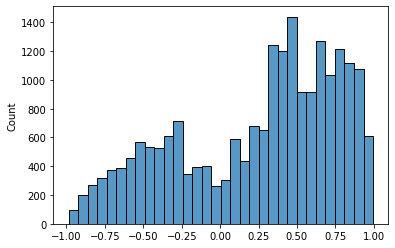

Tuesday :


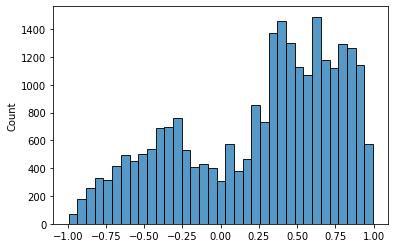

Wednesday :


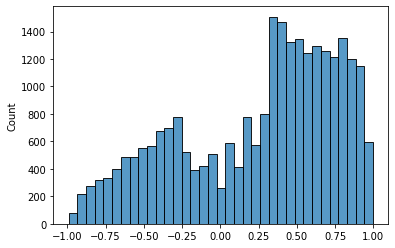

Thursday :


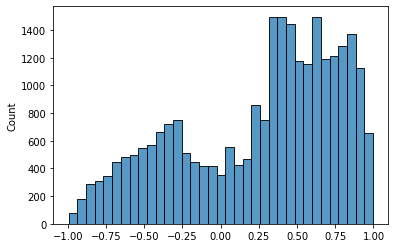

Friday :


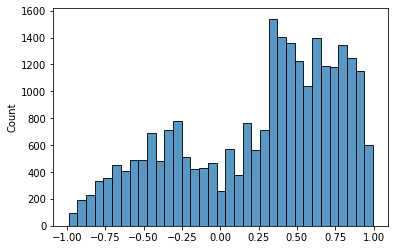

Saturday :


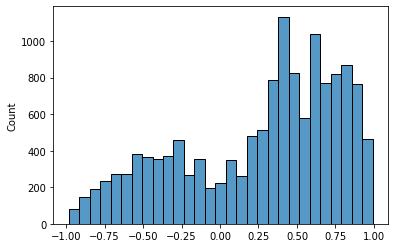

Sunday :


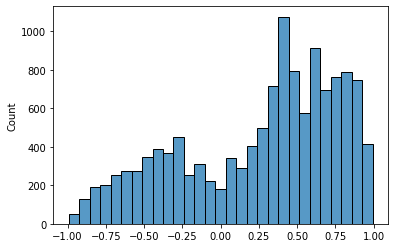

In [54]:
for d in weekdays:
    print(d, ':')
    sns.histplot([a for a in df.loc[df['day'] == d]['sentiment'].apply(lambda x: x.get('compound')) if a != 0])
    plt.show()

In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/main/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [25]:
analyzer.polarity_scores("It's not bad")

{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.431}

In [18]:
filename = 'quotes-2020_days.json.bz2' 
df = create_frame(filename, 100)

In [20]:
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day
0,2020-01-28-000082,[ D ] espite the efforts of the partners to cr...,None,[],2020-01-28 08:04:05,1,"[[None, 0.7272], [Prime Minister Netanyahu, 0....",[http://israelnationalnews.com/News/News.aspx/...,E,Tuesday
1,2020-01-16-000088,[ Department of Homeland Security ] was livid ...,Sue Myrick,[Q367796],2020-01-16 12:00:13,1,"[[Sue Myrick, 0.8867], [None, 0.0992], [Ron Wy...",[http://thehill.com/opinion/international/4782...,E,Thursday
2,2020-02-10-000142,... He (Madhav) also disclosed that the illega...,None,[],2020-02-10 23:45:54,1,"[[None, 0.8926], [Prakash Rai, 0.1074]]",[https://indianexpress.com/article/business/ec...,E,Monday
3,2020-02-15-000053,"... [ I ] f it gets to the floor,",None,[],2020-02-15 14:12:51,2,"[[None, 0.581], [Andy Harris, 0.4191]]",[https://patriotpost.us/opinion/68622-trump-bu...,E,Saturday
4,2020-01-24-000168,[ I met them ] when they just turned 4 and 7. ...,Meghan King Edmonds,[Q20684375],2020-01-24 20:37:09,4,"[[Meghan King Edmonds, 0.5446], [None, 0.2705]...",[https://people.com/parents/meghan-king-edmond...,E,Friday


In [ ]:
# To add the weekday to every quote of the dataset. This will save a new dataset with the added day in the folder "Quotebank_days"
# We create a new dataset to not alter the original in case of problems

years = [2015, 2016, 2017, 2018, 2019, 2020]

for year in tqdm(years):

  path_to_file = f'quotes-{year}.json.bz2' 
  path_to_out = f'quotes-{year}.json.bz2'

  with bz2.open(path_to_file, 'rb') as s_file:
    with bz2.open(path_to_out, 'wb') as d_file:
      for instance in tqdm(s_file):
        instance = json.loads(instance) # loading a sample
        day = retrieve_day(instance['date'])
        instance['day'] = day
        d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in the new file